Going through experimental data collected in lab for a small, soft neural interface device
with Ben Rees

-------------------------------------------

#### Notes

- 28 micron electrode diameter 
- In the CIC data, the current used to generate the measured voltage transient is recorded in the file, meaning you wouldn't need to do much to calculate the charge injection capacity (you know the stimulation pulse width, 0.001s). 
- Optional: calculate the amount of polarization measured during the stimulation pulse as well for your report to fill it out a little.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### 1. Test three samples. Plot electrochemical impedance spectroscopy (EIS) impedance and phase from 1 Hz to 100 kHz.

In [12]:
# read in data
eis_c1 = pd.read_csv('data/Small device 2 Ch 1 eis Day 0.txt', 
                     skiprows=17, delimiter=",", engine='python')
eis_c2 = pd.read_csv('data/Small device 2 Ch 2 eis Day 0.txt', 
                     skiprows=17, delimiter=",", engine='python')
eis_c3 = pd.read_csv('data/Small device 2 Ch 3 eis Day 0.txt',
                     skiprows=17, delimiter=",", engine='python')
eis_c4 = pd.read_csv('data/Small device 2 Ch 4 eis Day 0.txt',
                     skiprows=17, delimiter=",", engine='python')

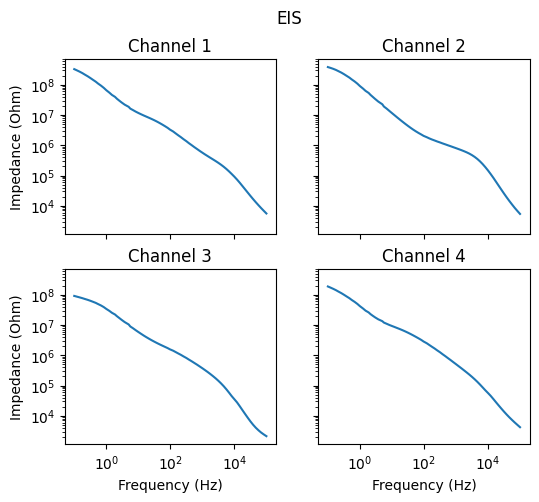

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(6, 5), sharex=True, sharey=True)

channels = [eis_c1, eis_c2, eis_c3, eis_c4]
titles = ['Channel 1', 'Channel 2', 'Channel 3', 'Channel 4']

for i, (df, title) in enumerate(zip(channels, titles)):
    ax = axs[i // 2, i % 2]
    ax.loglog(df['Freq/Hz'], df[' Z/ohm'])
    ax.set_title(title)
    if i % 2 == 0:
        ax.set_ylabel('Impedance (Ohm)')
    if i // 2 == 1:
        ax.set_xlabel('Frequency (Hz)')
    # ax.grid(True, which='both', ls='--', lw=)

fig.suptitle('EIS', fontsize=12)
# plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

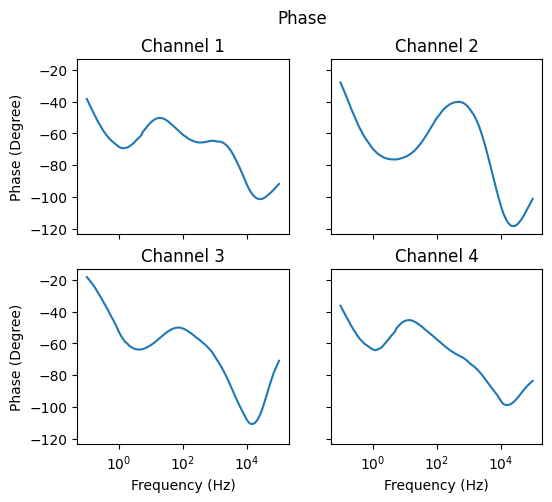

In [23]:
fig, axs = plt.subplots(2, 2, figsize=(6, 5), sharex=True, sharey=True)

channels = [eis_c1, eis_c2, eis_c3, eis_c4]
titles = ['Channel 1', 'Channel 2', 'Channel 3', 'Channel 4']

for i, (df, title) in enumerate(zip(channels, titles)):
    ax = axs[i // 2, i % 2]
    ax.semilogx(df['Freq/Hz'], df[' Phase/deg'])
    ax.set_title(title)
    if i % 2 == 0:
        ax.set_ylabel('Phase (Degree)')
    if i // 2 == 1:
        ax.set_xlabel('Frequency (Hz)')
    # ax.grid(True, which='both', ls='--', lw=)

fig.suptitle('Phase', fontsize=12)
# plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

C:\Users\momun\AppData\Local\Temp\ipykernel_9624\1153344606.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels([-3, -2, -1, 0, 1, 2, 3, 4, 5])


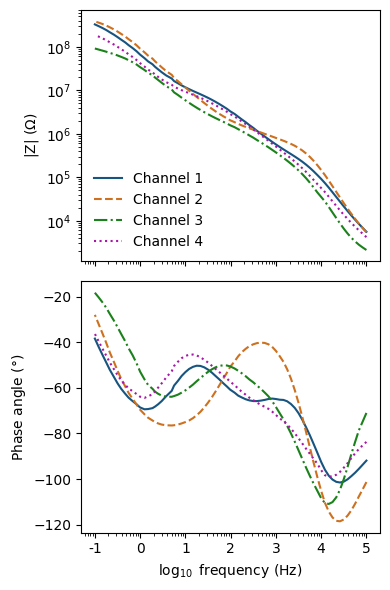

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(4, 6), sharex=True)
colors = ["#175480", "#ce701e", "#1b811b", "#a716a7"] 
linestyles = ['-', '--', '-.', ':']

for df, title, color, ls in zip(channels, titles, colors, linestyles):
    axs[0].loglog(df['Freq/Hz'], df[' Z/ohm'], label=title, color=color, linestyle=ls)
axs[0].set_ylabel(r'|Z| ($\Omega$)')
# axs[0].set_title('EIS')
axs[0].legend(frameon=False, loc='lower left')
# axs[0].grid(True, which='both', ls='--', lw=0.5)

for df, title, color, ls in zip(channels, titles, colors, linestyles):
    axs[1].semilogx(df['Freq/Hz'], df[' Phase/deg'], label=title, color=color, linestyle=ls)
axs[1].set_xlabel(r'$\log_{10}$ frequency (Hz)')
axs[1].set_ylabel(r'Phase angle ($\degree$)')
axs[1].set_xticklabels([-3, -2, -1, 0, 1, 2, 3, 4, 5])


plt.tight_layout()
plt.show()
# fig.savefig('figs/eis_plot1_v1.pdf', dpi=300)

#### 2. Plot cyclic voltammetry (CV) at sweep rate 10-100 mV/s, in a potential window of –0.6 V to +0.8 V.

In [42]:
# read in data
cv_c1 = pd.read_csv('data/Small device 2 Ch 1 CV Day 0.txt', 
                     skiprows=40, delimiter=",", engine='python')
cv_c2 = pd.read_csv('data/Small device 2 Ch 2 CV Day 0.txt', 
                     skiprows=40, delimiter=",", engine='python')
cv_c3 = pd.read_csv('data/Small device 2 Ch 3 CV Day 0.txt',
                     skiprows=40, delimiter=",", engine='python')
cv_c4 = pd.read_csv('data/Small device 2 Ch 4 CV Day 0.txt',
                     skiprows=40, delimiter=",", engine='python')

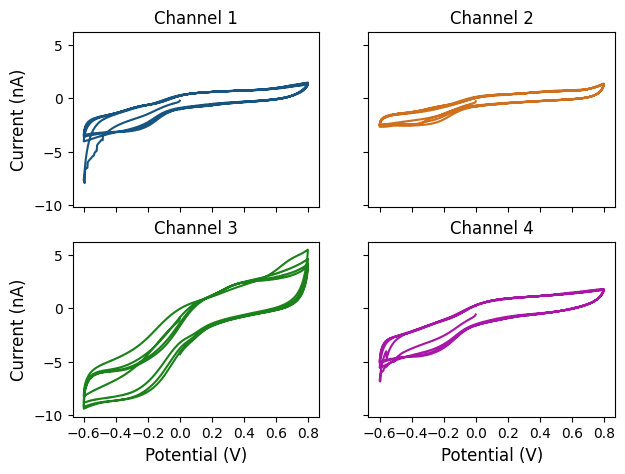

In [ ]:
channels = [cv_c1, cv_c2, cv_c3, cv_c4] #new channels

fig, axs = plt.subplots(2, 2, figsize=(7, 5), sharex=True, sharey=True)
for i, (df, title, color) in enumerate(zip(channels, titles, colors)):
    ax = axs[i // 2, i % 2]
    # convert to nA
    ax.plot(df['Potential/V'], df[' Current/A'] * 1e9, label=title, color=color)
    ax.set_title(title, fontsize=12)
    if i % 2 == 0:
        ax.set_ylabel('Current (nA)', fontsize=12)
    if i // 2 == 1:
        ax.set_xlabel('Potential (V)', fontsize=12)
        ax.set_xticks(np.arange(-0.6, 0.81, 0.2))

# fig.savefig('figs/cv_plot2_v1.pdf', dpi=300)

3. Calculate charge storage capacity (CSC) based on CV integration.

4. Plot voltage transients (VT) measured during current pulse stimulation (e.g., 1000 µs pulse width).

5. Calculate charge injection capacity (CIC) derived from VT data.

6. Compare the results: If different, how are they different? Which electrode performs better or worse, and what could be the underlying reasons?

7. Suggest possible improvements to the current setup in various aspects (e.g., electrode design, measurement settings, or data acquisition).